<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/A_Carol_create_haemo_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & import `nilearn` and `mne-nirs`

In [17]:
#@markdown
!pip install nilearn
!pip install -U --no-deps https://github.com/mne-tools/mne-python/archive/main.zip
!pip install mne-nirs

from mne.io import read_raw_nirx
from mne.preprocessing.nirs import (optical_density, beer_lambert_law,
                                    temporal_derivative_distribution_repair)
import mne 



  Using cached https://github.com/mne-tools/mne-python/archive/main.zip


## Mount Google Drive

In [18]:
#@markdown
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Common Imports

In [19]:
#@markdown 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

import h5py
from itertools import compress
from sklearn.preprocessing import scale
from google.colab import widgets

# Copia todos arquivos do drive para local

In [20]:
import os
path_in = '/content/drive/MyDrive/Cond 2/snirf/'
# path_in = '/content/drive/MyDrive/cond 1/snirf/'

if 'cond 1' in path_in:
  condicao = 1
else:
  condicao = 2
  
path_out = '/content/'



In [21]:
import pickle

# selected_sub_channels = {'selected_sub' : selected_sub, 'good_list': good_list , 'bad_list': bad_list, 'channel_SD_selected':channel_SD_selected }

# To write  pickle
# filename = path_in + 'selected_sub_channels.pickle'
# outfile = open(filename,'wb')
# pickle.dump(selected_sub_channels,outfile)
# outfile.close()

# To retrieve pickle
filename = path_in + 'selected_sub_channels.pickle'
infile = open(filename,'rb')
selected_sub_channels = pickle.load(infile)
infile.close()

selected_sub_channels.keys()

dict_keys(['selected_sub', 'good_list', 'bad_list', 'channel_SD_selected'])

In [22]:
selected_sub = selected_sub_channels['selected_sub']
good_list = selected_sub_channels['good_list']
bad_list = selected_sub_channels['bad_list']
channel_SD_selected = selected_sub_channels['channel_SD_selected']

In [23]:
path_in = path_in + 'snirf0/'
entries = os.listdir(path_in)
entries = [ x for x in entries if '.snirf' in x ]
print(entries)



['31_run2.snirf', '12_run2.snirf', '6_run2.snirf', '5_run2.snirf', '13_run2.snirf', '19_run2.snirf', '28_run2.snirf', '21_run2.snirf', '11_run2.snirf', '23_run2.snirf', '26_run2.snirf', '27_run2.snirf', '36_run2.snirf', '35_run2.snirf']


# Check One instance

In [24]:
path_out = path_in
path_out

'/content/drive/MyDrive/Cond 2/snirf/snirf0/'

In [25]:
#@markdown def plt_hemo(raw_haemo=raw_haemo, e1='Sync1', c1='controle1', e2='Async1', c2='controle2')
def plt_hemo(raw_haemo, e1='Sync1', c1='controle1', e2='Async1', c2='controle2'):
  evoked_dict_Sync = {'Sync/HbO': epochs[e1].average(picks='hbo'),
                'Sync/HbR': epochs[e1].average(picks='hbr'),
                'controle/HbO': epochs[c1].average(picks='hbo'),
                'controle/HbR': epochs[c1].average(picks='hbr')}

  evoked_dict_Async = {'Async/HbO': epochs[e2].average(picks='hbo'),
                'Async/HbR': epochs[e2].average(picks='hbr'),
                'controle/HbO': epochs[c2].average(picks='hbo'),
                'controle/HbR': epochs[c2].average(picks='hbr')}
  # print(evoked_dict_Sync)
  # print(evoked_dict_Sync)

  color_dict = dict(HbO='#AA3377', HbR='b')
  styles_dict = dict(controle=dict(linestyle='dashed'))

  fig, ax = plt.subplots(1,1,figsize=(5,5))

  # Rename channels until the encoding of frequency in ch_name is fixed
  evoked_dict = evoked_dict_Sync
  for condition in evoked_dict:
      evoked_dict[condition].rename_channels(lambda x: x[:-4]) # retira hbo e hbr do suffixo dos nomes      
  # print(evoked_dict)

  print('*')
  print('* ' + raw_haemo.filenames[0] + ' ' + e1 + ' X ' + c1)
  print('*' + 70*'-')
  fig1 = mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                                colors=color_dict, styles=styles_dict, axes=ax, title=raw_haemo.filenames[0], show=False)

  # fig1[0].savefig(subject+'_Sync.png')
  plt.show()

  fig, ax = plt.subplots(1,1,figsize=(5,5))

  evoked_dict = evoked_dict_Async
  for condition in evoked_dict:
      evoked_dict[condition].rename_channels(lambda x: x[:-4])        
  # print(evoked_dict)

  print('*')
  print('* ' + raw_haemo.filenames[0] + ' ' + e2 + ' X ' + c2)
  print('*' + 70*'-')
  fig2 = mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                              colors=color_dict, styles=styles_dict, axes=ax, title=raw_haemo.filenames[0], show=False)

  # fig2[0].savefig(subject+'_Async.png')
  plt.show()

  return



Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf
Reading 0 ... 21812  =      0.000 ...  2181.200 secs...


<ipython-input-27-6112fe75d1d7>:22: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)


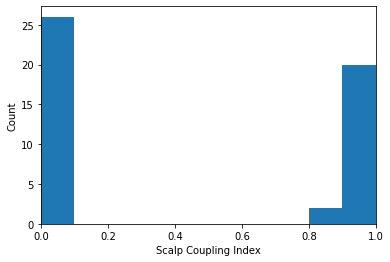

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-27-6112fe75d1d7>:34: UserWarning: Infinite value in PSD for channels S1_D8 hbo, S1_D14 hbo, S2_D2 hbo, S2_D3 hbo, S2_D9 hbo, S2_D11 hbo, S3_D4 hbo, S3_D5 hbo, S3_D9 hbo, S3_D10 hbo, S3_D12 hbo, S4_D7 hbo, S6_D10 hbo.
These channels might be dead.
  fig = raw_haemo.plot_psd(average=True)
<ipython-input-27-6112fe75d1d7>:34: UserWarning: Infinite value in PSD for channels S1_D8 hbr, S1_D14 hbr, S2_D2 hbr, S2_D3 hbr, S2_D9 hbr, S2_D11 hbr, S3_D4 hbr, S3_D5 hbr, S3_D9 hbr, S3_D10 hbr, S3_D12 hbr, S4_D7 hbr, S6_D10 hbr.
The

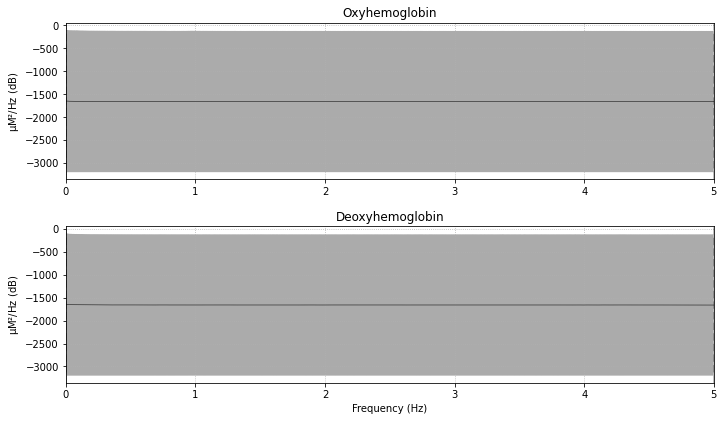

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-27-6112fe75d1d7>:39: UserWarning: Infinite value in 

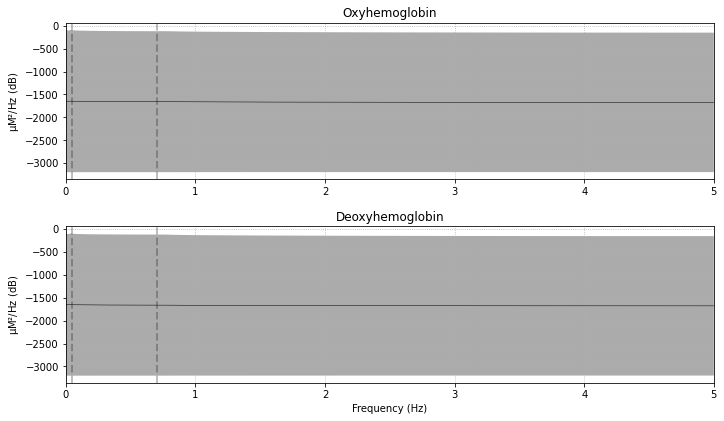

<Info | 9 non-empty values
 bads: []
 ch_names: S1_D1 hbo, S1_D1 hbr, S1_D8 hbo, S1_D8 hbr, S1_D14 hbo, S1_D14 ...
 chs: 24 Oxyhemoglobin, 24 Deoxyhemoglobin
 custom_ref_applied: False
 dig: 51 items (3 Cardinal, 48 EEG)
 highpass: 0.1 Hz
 lowpass: 0.7 Hz
 meas_date: 2021-12-09 10:12:50 UTC
 nchan: 48
 projs: []
 sfreq: 10.0 Hz
 subject_info: 1 item (dict)
>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


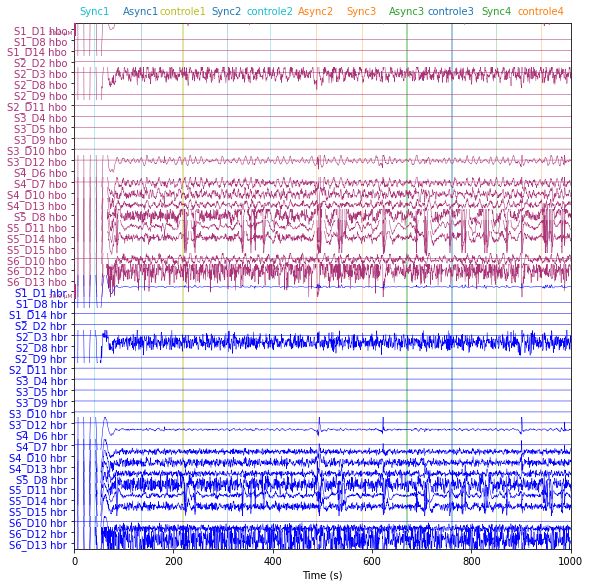

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not setting metadata
24 matching events found
Setting baseline interval to [-5.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 201 original time points ...
0 bad epochs dropped


<ipython-input-27-6112fe75d1d7>:66: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  sfreq=raw_haemo.info['sfreq'])


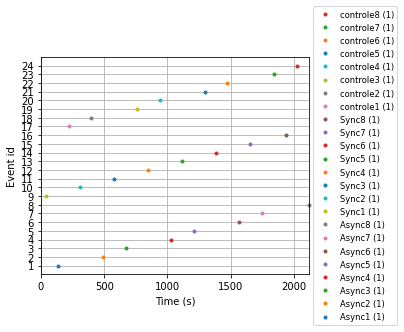

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync1 X controle1
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


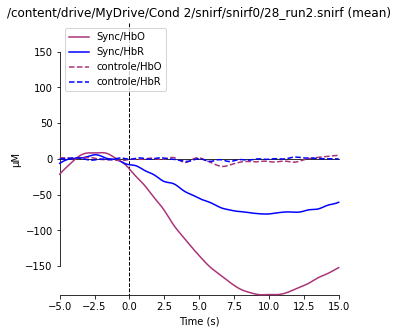

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async1 X controle1
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


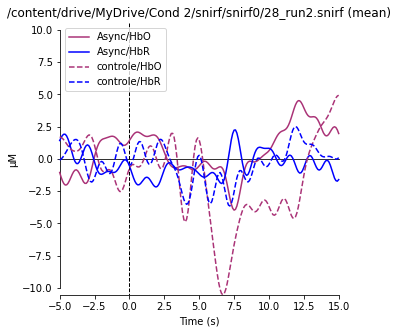

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync2 X controle2
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


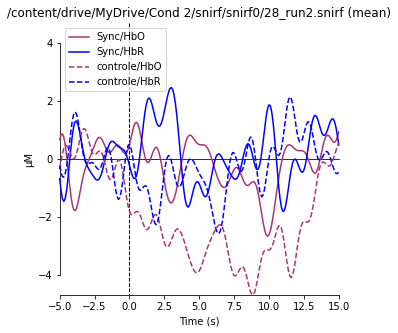

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async2 X controle2
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


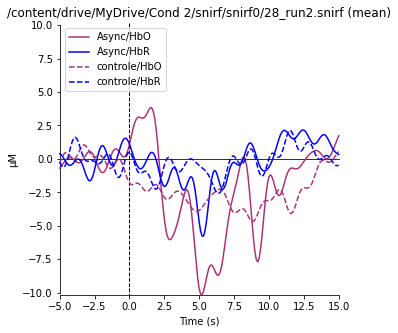

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync3 X controle3
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


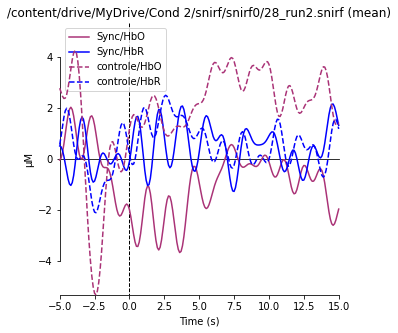

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async3 X controle3
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


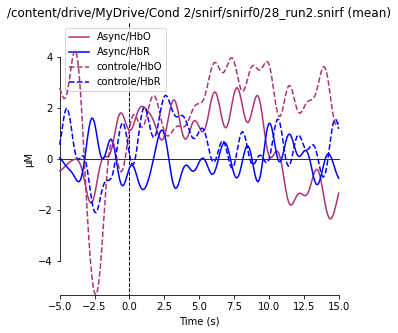

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync4 X controle4
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


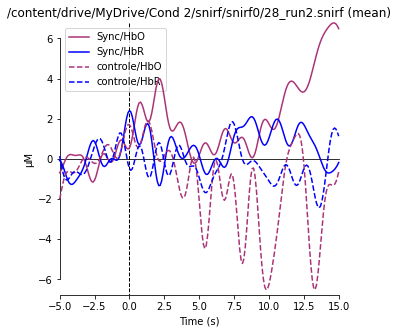

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async4 X controle4
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


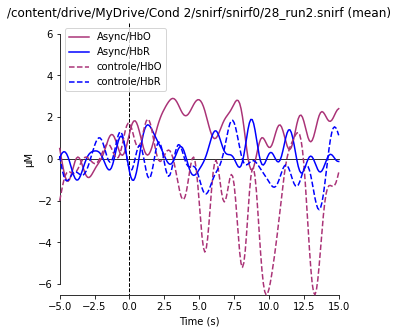

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync5 X controle5
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


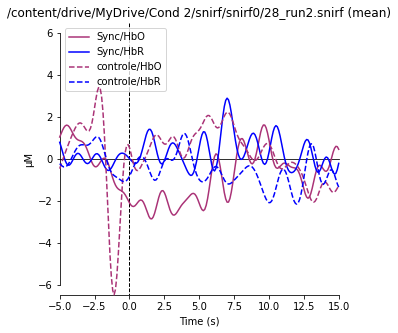

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async5 X controle5
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


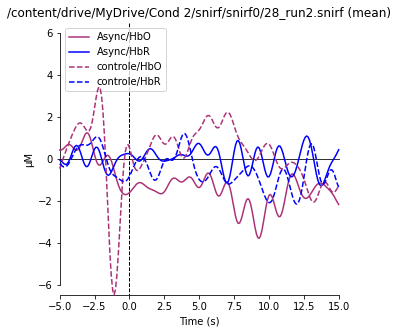

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync6 X controle6
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


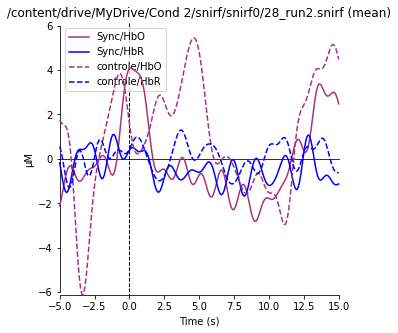

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async6 X controle6
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


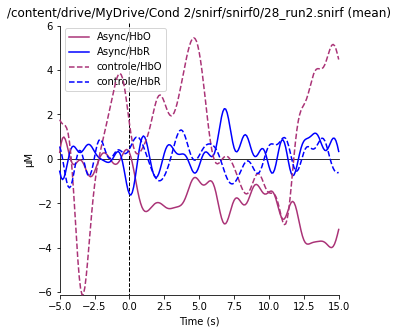

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync7 X controle7
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


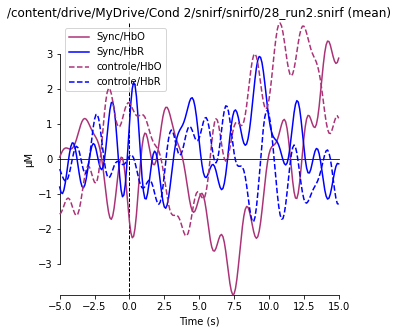

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async7 X controle7
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


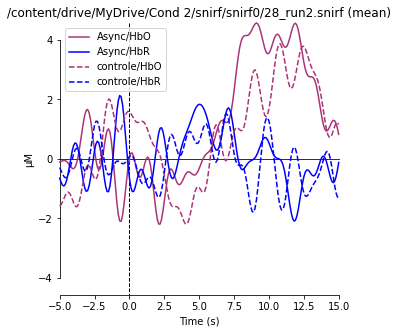

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Sync8 X controle8
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


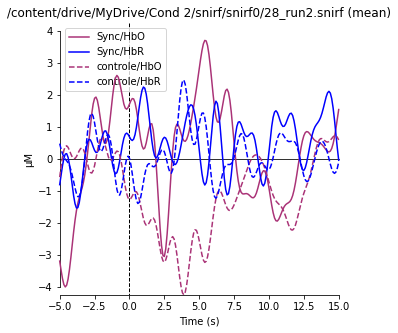

*
* /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf Async8 X controle8
*----------------------------------------------------------------------
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


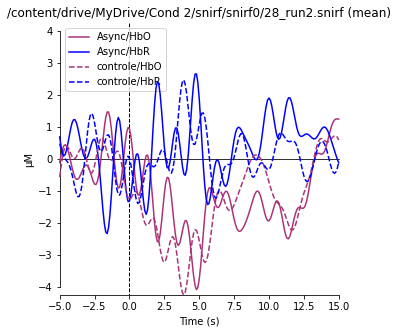

In [27]:
from mne.io import read_raw_nirx
from mne.preprocessing.nirs import (optical_density, beer_lambert_law,
                                    temporal_derivative_distribution_repair)
import mne
import pickle

threshold = 0.60 # FOR bad_list... se você tiver uma trocar!

if condicao == 1:
  # entries_sample = [ entries[4] ]
  entries_sample = [ '25_run1.snirf' ]
else:
  # entries_sample = [ entries[1] ]
  entries_sample = [ '28_run2.snirf' ]

sci_df_exists = False
sci_df = pd.DataFrame()

for fname in entries_sample:
  raw_intensity = mne.io.read_raw_snirf(path_out + fname, verbose=True)
  raw_intensity.load_data()
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
  sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)
  
  fig, ax = plt.subplots()
  ax.hist(sci)
  ax.set(xlabel='Scalp Coupling Index', ylabel='Count', xlim=[0, 1])
  plt.show()
  
  # raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < threshold))
  # raw_od.info['bads'] =  bad_list
  raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)

  fig = raw_haemo.plot_psd(average=True)
  fig.suptitle('Before filtering', weight='bold', size='x-large')
  fig.subplots_adjust(top=0.88)
  raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                              l_trans_bandwidth=0.02)
  fig = raw_haemo.plot_psd(average=True)
  fig.suptitle('After filtering', weight='bold', size='x-large')
  fig.subplots_adjust(top=0.88)
  plt.show()

  print(raw_haemo.info)

  raw_haemo.plot(n_channels=48, duration=1000, show_scrollbars=False)
  plt.show()

  events, event_dict = mne.events_from_annotations(raw_haemo)

  # events, _ = mne.events_from_annotations(raw_haemo)
  # event_dict = {'Async': 2, 'Sync': 3, 'controle': 4}

  reject_criteria = dict(hbo=80e-6)
  tmin, tmax = -5, 15

  epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                      tmin=tmin, tmax=tmax,
  #                    reject=reject_criteria, reject_by_annotation=True,
                      proj=True, baseline=(None, 0), preload=True,
                      detrend=None, verbose=True,
                      event_repeated='merge') # ADICIONADO Allowed values are 'error', 'drop', and 'merge'
  # epochs.plot_drop_log()

  fig = mne.viz.plot_events(events, event_id=event_dict,
                          sfreq=raw_haemo.info['sfreq'])
  fig.subplots_adjust(right=0.7)  # make room for the legend

  for i in range(8):
    n = str(i+1)
    plt_hemo(raw_haemo=raw_haemo, e1='Sync'+n, c1='controle'+n, e2='Async'+n, c2='controle'+n)


# Process all

In [28]:
from mne.io import read_raw_nirx
from mne.preprocessing.nirs import (optical_density, beer_lambert_law,
                                    temporal_derivative_distribution_repair)
import mne
import pickle

# subject = '27_run2'
threshold = 0.95

# entries = [subject + '.snirf']
# entries_sample = [ entries[0] ]
entries_sample = entries
print(entries_sample)

sci_df_exists = False
sci_df = pd.DataFrame()

raw_haemo_all = {}
epochs_all = {}

for fname in entries_sample:
  raw_intensity = mne.io.read_raw_snirf(path_in + fname, verbose=True)
  raw_intensity.load_data()
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
 
  raw_od.info['bads'] =  bad_list
  raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)

  raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                              l_trans_bandwidth=0.02)

  events, event_dict = mne.events_from_annotations(raw_haemo)

  reject_criteria = dict(hbo=80e-6)
  tmin, tmax = -5, 10

  epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                      tmin=tmin, tmax=tmax,
  #                    reject=reject_criteria, reject_by_annotation=True,
                      proj=True, baseline=(None, 0), preload=True,
                      detrend=None, verbose=True,
                      event_repeated='merge') # ADICIONADO Allowed values are 'error', 'drop', and 'merge'
  
  raw_haemo_all[fname.split('.')[0]] = raw_haemo
  epochs_all[fname.split('.')[0]] = epochs
   




['31_run2.snirf', '12_run2.snirf', '6_run2.snirf', '5_run2.snirf', '13_run2.snirf', '19_run2.snirf', '28_run2.snirf', '21_run2.snirf', '11_run2.snirf', '23_run2.snirf', '26_run2.snirf', '27_run2.snirf', '36_run2.snirf', '35_run2.snirf']
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/31_run2.snirf
Reading 0 ... 21700  =      0.000 ...  2170.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'As

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/12_run2.snirf
Reading 0 ... 21738  =      0.000 ...  2173.800 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Using data from preloaded Raw for 24 events and 151 original time points ...
0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/6_run2.snirf
Reading 0 ... 21900  =      0.000 ...  2190.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'cont

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/5_run2.snirf
Reading 0 ... 21900  =      0.000 ...  2190.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not 

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Reading 0 ... 21842  =      0.000 ...  2184.200 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not setting metadata
24 matching events found
Setting baseline interval to [-5.0, 0.0] se

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/19_run2.snirf
Reading 0 ... 21900  =      0.000 ...  2190.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/28_run2.snirf
Reading 0 ... 21812  =      0.000 ...  2181.200 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/21_run2.snirf
Reading 0 ... 22200  =      0.000 ...  2220.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/11_run2.snirf
Reading 0 ... 21446  =      0.000 ...  2144.600 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not setting metadata
24 

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Using data from preloaded Raw for 24 events and 151 original time points ...
0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/23_run2.snirf
Reading 0 ... 21563  =      0.000 ...  2156.300 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'con

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Setting baseline interval to [-5.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 151 original time points ...
0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/26_run2.snirf
Reading 0 ... 21594  =      0.000 ...  2159.400 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Setting baseline interval to [-5.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 151 original time points ...
0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/27_run2.snirf
Reading 0 ... 21812  =      0.000 ...  2181.200 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


Reading 0 ... 21615  =      0.000 ...  2161.500 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not setting metadata
24 matching events found
Setting baseline interval to [-5.0, 0.0] se

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped
Loading /content/drive/MyDrive/Cond 2/snirf/snirf0/35_run2.snirf
Reading 0 ... 22200  =      0.000 ...  2220.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)

Used Annotations descriptions: ['Async1', 'Async2', 'Async3', 'Async4', 'Async5', 'Async6', 'Async7', 'Async8', 'Sync1', 'Sync2', 'Sync3', 'Sync4', 'Sync5', 'Sync6', 'Sync7', 'Sync8', 'controle1', 'controle2', 'controle3', 'controle4', 'controle5', 'controle6', 'controle7', 'controle8']
Not

<ipython-input-28-aafaf4f0f577>:24: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


0 bad epochs dropped


# Save tables

In [29]:
import pickle

# To write pickle
filename = path_in + 'raw_haemo_all.pickle'
outfile = open(filename,'wb')
pickle.dump(raw_haemo_all,outfile)
outfile.close()

filename = path_in + 'epochs_all.pickle'
outfile = open(filename,'wb')
pickle.dump(epochs_all,outfile)
outfile.close()

# To retrieve pickle
# infile = open(filename,'rb')
# new_dict = pickle.load(infile)
# infile.close()


In [30]:
raw_haemo_all

{'11_run2': <RawSNIRF | 11_run2.snirf, 48 x 21447 (2144.6 s), ~7.9 MB, data loaded>,
 '12_run2': <RawSNIRF | 12_run2.snirf, 48 x 21739 (2173.8 s), ~8.0 MB, data loaded>,
 '13_run2': <RawSNIRF | 13_run2.snirf, 48 x 21843 (2184.2 s), ~8.1 MB, data loaded>,
 '19_run2': <RawSNIRF | 19_run2.snirf, 48 x 21901 (2190.0 s), ~8.1 MB, data loaded>,
 '21_run2': <RawSNIRF | 21_run2.snirf, 48 x 22201 (2220.0 s), ~8.2 MB, data loaded>,
 '23_run2': <RawSNIRF | 23_run2.snirf, 48 x 21564 (2156.3 s), ~8.0 MB, data loaded>,
 '26_run2': <RawSNIRF | 26_run2.snirf, 48 x 21595 (2159.4 s), ~8.0 MB, data loaded>,
 '27_run2': <RawSNIRF | 27_run2.snirf, 48 x 21813 (2181.2 s), ~8.1 MB, data loaded>,
 '28_run2': <RawSNIRF | 28_run2.snirf, 48 x 21813 (2181.2 s), ~8.1 MB, data loaded>,
 '31_run2': <RawSNIRF | 31_run2.snirf, 48 x 21701 (2170.0 s), ~8.0 MB, data loaded>,
 '35_run2': <RawSNIRF | 35_run2.snirf, 48 x 22201 (2220.0 s), ~8.2 MB, data loaded>,
 '36_run2': <RawSNIRF | 36_run2.snirf, 48 x 21616 (2161.5 s), ~8.

# Gera Excel




In [31]:
for k in raw_haemo_all:
  df_raw_haemo = raw_haemo_all[k].to_data_frame()
  df_raw_haemo.to_excel(path_in + k + '_' + 'haemo' + '.xlsx',index=None)

In [32]:
df_raw_haemo.head()

,time,S1_D1 hbo,S1_D1 hbr,S1_D8 hbo,S1_D8 hbr,S1_D14 hbo,S1_D14 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S5_D14 hbo,S5_D14 hbr,S5_D15 hbo,S5_D15 hbr,S6_D10 hbo,S6_D10 hbr,S6_D12 hbo,S6_D12 hbr,S6_D13 hbo,S6_D13 hbr
0,0,-5.421011e-14,-7.792703e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.710505e-13,4.404571e-14,5.692061e-13,1.287490e-13,0.0,0.0,-2.507218e-13,-2.913793e-13,3.862470e-13,3.354250e-13
1,100,1.028314e+03,-1.468385e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.305503e+03,-9.716662e+02,-2.247637e+03,-9.376445e+02,0.0,0.0,-2.214856e+03,-9.178030e+02,-2.172196e+03,-9.073480e+02
2,200,1.967721e+03,-2.809383e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.410865e+03,-1.859023e+03,-4.300197e+03,-1.793931e+03,0.0,0.0,-4.237474e+03,-1.755960e+03,-4.155798e+03,-1.735983e+03
3,300,2.742722e+03,-3.914777e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.146069e+03,-2.590448e+03,-5.991962e+03,-2.499744e+03,0.0,0.0,-5.904551e+03,-2.446810e+03,-5.790596e+03,-2.419037e+03
4,400,3.302085e+03,-4.711213e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.395883e+03,-3.117393e+03,-7.210608e+03,-3.008232e+03,0.0,0.0,-7.105403e+03,-2.944490e+03,-6.968012e+03,-2.911185e+03


In [33]:
for k in epochs_all:
  df_epochs = epochs_all[k].to_data_frame()
  df_epochs.to_excel(path_in + k + '_' + 'epochs' + '.xlsx',index=None)

df_epochs.head()

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D8 hbo,S1_D8 hbr,S1_D14 hbo,S1_D14 hbr,S2_D2 hbo,...,S5_D14 hbo,S5_D14 hbr,S5_D15 hbo,S5_D15 hbr,S6_D10 hbo,S6_D10 hbr,S6_D12 hbo,S6_D12 hbr,S6_D13 hbo,S6_D13 hbr
0,-5000,Sync1,0,26.544220,-38.496506,0.0,0.0,0.0,0.0,0.0,...,-37.202866,-11.326272,-25.551500,-16.198796,0.0,0.0,-41.110351,-18.232126,-42.129678,-14.480058
1,-4900,Sync1,0,35.152226,-35.900767,0.0,0.0,0.0,0.0,0.0,...,-32.523224,-9.281832,-23.129735,-14.445593,0.0,0.0,-36.319036,-16.023217,-38.023490,-12.065226
2,-4800,Sync1,0,42.037686,-33.035504,0.0,0.0,0.0,0.0,0.0,...,-28.567490,-7.609530,-21.264286,-12.730549,0.0,0.0,-31.838530,-13.796480,-33.847971,-10.091339
3,-4700,Sync1,0,46.535159,-29.881571,0.0,0.0,0.0,0.0,0.0,...,-25.183298,-6.311176,-19.832353,-11.082271,0.0,0.0,-27.614340,-11.587546,-29.525941,-8.560296
4,-4600,Sync1,0,48.153743,-26.461919,0.0,0.0,0.0,0.0,0.0,...,-22.191495,-5.350976,-18.667327,-9.539518,0.0,0.0,-23.590862,-9.440015,-25.062435,-7.401990
